<a href="https://colab.research.google.com/github/CedricBone/Genesee-River/blob/main/Regression(1_5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Genesee River Predictions (GRP) 2.0
## https://dashboard.waterdata.usgs.gov/app/nwd/?region=lower48&aoi=default

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [15]:
def clean_data(list):
  row = 0
  numMissingData = 0
  for data in list:
    if(data == ''):
      data = 0
      list[row] = 0
      numMissingData += 1
    else:
      try:
        list[row] = int(data)
      except:
        list[row] = float(data)
    row+=1
  mean =sum(list) / (len(list) - numMissingData)
  for index in range (0, len(list)):
    if list[index] == 0
     list[index] = mean

In [16]:
def normilize(data_set):
  mean = 0
  for data in data_set:
    mean += data
  mean = mean/len(data_set)

  std = 0
  for data in data_set:
    std += (data - mean)**2
  std = (std/len(data_set))**(1/2)
  if(std==0):
    std = 0.00000000000000001

  row = 0
  for data in data_set:
    data_set[row] = abs( (data-mean)/std )
    row+=1

In [17]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
      ])
  model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [18]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

In [19]:
train_data_path = '/content/drive/MyDrive/Fall 2021/Engineering Intramurals /Rochester(11-21).txt'

train_dates = []           # Date
train_times = []           # Time (EST)
train_discharge = []       # Rate of Discharge (FT^3/s)
train_temperature = []     # Temperature (C)
train_PH = []              # PH 
train_dissolved_o2 = []    # Dissolved Oxygen (mg/L)
train_gauge_height = []    # Gauge Height (Ft)


with open(train_data_path, newline = '') as train_riverDataSets:
    riverDataSet_reader = csv.reader(train_riverDataSets, delimiter='\t')
    for train_riverDataSet in riverDataSet_reader:
      
      train_dates.append(train_riverDataSet[2][0:10])
      train_times.append(train_riverDataSet[2][11:])
      train_discharge.append((train_riverDataSet[4]))
      train_temperature.append((train_riverDataSet[6]))
      train_PH.append((train_riverDataSet[8]))
      train_dissolved_o2.append((train_riverDataSet[10]))
      train_gauge_height.append((train_riverDataSet[12]))

In [20]:
train_year = []
train_month = []
train_day = []
train_hour = []
train_minute = []

for date in train_dates:
    train_year.append(int(date[0:4]))
    train_month.append(int(date[5:7]))
    train_day.append(int(date[8:]))
    
for time in train_times:
    train_hour.append(int(time[0:2]))
    train_minute.append(int(time[3:]))

In [21]:
clean_data(train_discharge)
#normilize(train_discharge)

clean_data(train_temperature)
#normilize(train_temperature)

clean_data(train_PH)
#normilize(train_PH)

clean_data(train_dissolved_o2)
#normilize(train_dissolved_o2)

clean_data(train_gauge_height)
#normilize(train_gauge_height)

clean_data(train_year)
#normilize(train_year)

clean_data(train_month)
#normilize(train_month)

clean_data(train_day)
#normilize(train_day)

clean_data(train_hour)
#normilize(train_hour)

clean_data(train_minute)
#normilize(train_minute)

In [22]:
train_riverData = []
for number in range(len(train_dates)):
    tempList = []
    tempList.append(train_year[number])
    tempList.append(train_month[number])
    tempList.append(train_day[number])
    tempList.append(train_hour[number])
    tempList.append(train_minute[number])
    tempList.append(train_discharge[number])
    tempList.append(train_temperature[number])
    tempList.append(train_PH[number])
    tempList.append(train_dissolved_o2[number])
    train_riverData.append(tempList)

In [23]:
#model_path = '/content/drive/MyDrive/Fall 2021/Engineering Intramurals /my_model.h5'
#dnn_model = tf.keras.models.load_model(model_path)

In [24]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_riverData))
dnn_model = build_and_compile_model(normalizer)

In [25]:
%%time
history = dnn_model.fit(
    np.array(train_riverData),
    np.array(train_gauge_height),
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 25min 8s, sys: 2min 33s, total: 27min 41s
Wall time: 19min 49s


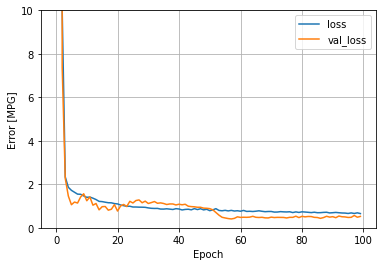

In [26]:
plot_loss(history)

In [27]:
dnn_model.evaluate(train_riverData, train_gauge_height, verbose=0)

0.7544804215431213

In [28]:
test_data_path = '/content/drive/MyDrive/Fall 2021/Engineering Intramurals /Rochester(21-21).txt'

test_dates = []           # Date
test_times = []           # Time (EST)
test_discharge = []       # Rate of Discharge (FT^3/s)
test_temperature = []     # Temperature (C)
test_PH = []              # PH 
test_dissolved_o2 = []    # Dissolved Oxygen (mg/L)
test_gauge_height = []    # Gauge Height (Ft)


with open(test_data_path, newline = '') as test_riverDataSets:
    riverDataSet_reader = csv.reader(test_riverDataSets, delimiter='\t')
    for test_riverDataSet in riverDataSet_reader:
      if (test_riverDataSet[0] == 'USGS'):
        test_dates.append(test_riverDataSet[2][0:10])
        test_times.append(test_riverDataSet[2][11:])
        test_discharge.append((test_riverDataSet[4]))
        test_temperature.append((test_riverDataSet[6]))
        test_PH.append((test_riverDataSet[8]))
        test_dissolved_o2.append((test_riverDataSet[10]))
        test_gauge_height.append((test_riverDataSet[12]))

In [29]:
test_year = []
test_month = []
test_day = []
test_hour = []
test_minute = []

for date in test_dates:
    test_year.append(int(date[0:4]))
    test_month.append(int(date[5:7]))
    test_day.append(int(date[8:]))
    
for time in test_times:
    test_hour.append(int(time[0:2]))
    test_minute.append(int(time[3:]))

In [30]:
clean_data(test_discharge)
#normilize(test_discharge)

clean_data(test_temperature)
#normilize(test_temperature)

clean_data(test_PH)
#normilize(test_PH)

clean_data(test_dissolved_o2)
#normilize(test_dissolved_o2)

clean_data(test_gauge_height)
#normilize(test_gauge_height)

clean_data(test_year)
#normilize(test_year)

clean_data(test_month)
#normilize(test_month)

clean_data(test_day)
#normilize(test_day)

clean_data(test_hour)
#normilize(test_hour)

clean_data(test_minute)
#normilize(test_minute)

In [31]:
test_riverData = []
for number in range(len(test_dates)):
    tempList = []
    tempList.append(test_year[number])
    tempList.append(test_month[number])
    tempList.append(test_day[number])
    tempList.append(test_hour[number])
    tempList.append(test_minute[number])
    tempList.append(test_discharge[number])
    tempList.append(test_temperature[number])
    tempList.append(test_PH[number])
    tempList.append(test_dissolved_o2[number])
    test_riverData.append(tempList)

In [33]:
test_predictions = dnn_model.predict(test_riverData)
predictions = []
for prediction in test_predictions:
  predictions.append(prediction[0])
data = {'gauge_height':  test_gauge_height,
        'test_predictions': predictions}

df = pd.DataFrame(data)

print (df)

      gauge_height  test_predictions
0            12.67         12.707086
1            12.66         12.707086
2            12.66         12.707086
3            12.66         12.707086
4            12.66         12.707086
...            ...               ...
1510         12.72         12.707086
1511         12.72         12.707086
1512         12.71         12.707086
1513         12.71         12.707086
1514         12.71         12.707086

[1515 rows x 2 columns]


In [34]:
test_results = {}
test_results['dnn_model'] = dnn_model.evaluate(test_riverData, test_gauge_height, verbose=0)
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
dnn_model,0.133908


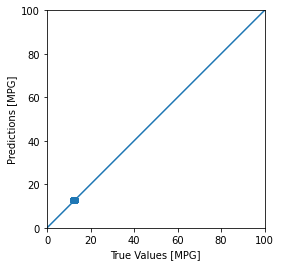

In [37]:
a = plt.axes(aspect='equal')
plt.scatter(test_gauge_height, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

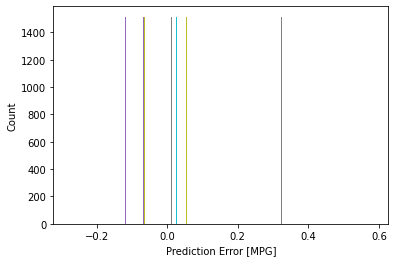

In [38]:
error = test_predictions - test_gauge_height
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [42]:
print(test_riverData[200])
print(test_gauge_height[200])
print(test_predictions[200])

[2021, 10, 3, 2, 0, 1190, 16.5, 7.8, 8.6]
12.74
[12.707]
